In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

datos = pd.read_csv('https://raw.githubusercontent.com/robintux/Datasets4StackOverFlowQuestions/master/Consumo_cerveza_SP.csv')

In [22]:
datos.isna().sum()

Data                           576
Temperatura Media (C)          576
Temperatura Minima (C)         576
Temperatura Maxima (C)         576
Precipitacao (mm)              576
Final de Semana                576
Consumo de cerveja (litros)    576
dtype: int64

In [26]:
datos.rename(columns={
    'Temperatura Media (C)': 'Temperatura_Media',
    'Temperatura Minima (C)': 'Temperatura_Minima',
    'Temperatura Maxima (C)': 'Temperatura_Maxima',
    'Precipitacao (mm)': 'Precipitacion',
    'Final de Semana': 'Fin_de_semana',
    'Consumo de cerveja (litros)': 'Consumo_litros'
}, inplace=True)

In [28]:
datos

,Data,Temperatura_Media,Temperatura_Minima,Temperatura_Maxima,Precipitacion,Fin_de_semana,Consumo_litros
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
datos.Temperatura_Media=datos.Temperatura_Media.str.replace(',','.').astype(float)
datos.Temperatura_Minima=datos.Temperatura_Minima.str.replace(',','.').astype(float)
datos.Temperatura_Maxima=datos.Temperatura_Maxima.str.replace(',','.').astype(float)
datos.Precipitacion=datos.Precipitacion.str.replace(',','.').astype(float)

In [31]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Data                365 non-null    object 
 1   Temperatura_Media   365 non-null    float64
 2   Temperatura_Minima  365 non-null    float64
 3   Temperatura_Maxima  365 non-null    float64
 4   Precipitacion       365 non-null    float64
 5   Fin_de_semana       365 non-null    float64
 6   Consumo_litros      365 non-null    float64
dtypes: float64(6), object(1)
memory usage: 51.6+ KB


In [32]:
datos = datos.dropna()
datos.isna().sum()

Data                  0
Temperatura_Media     0
Temperatura_Minima    0
Temperatura_Maxima    0
Precipitacion         0
Fin_de_semana         0
Consumo_litros        0
dtype: int64

In [34]:
datos.Data = pd.to_datetime(datos.Data)
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Data                365 non-null    datetime64[ns]
 1   Temperatura_Media   365 non-null    float64       
 2   Temperatura_Minima  365 non-null    float64       
 3   Temperatura_Maxima  365 non-null    float64       
 4   Precipitacion       365 non-null    float64       
 5   Fin_de_semana       365 non-null    float64       
 6   Consumo_litros      365 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 22.8 KB


C:\Users\ldanl\AppData\Local\Temp\ipykernel_28420\3214549495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos.Data = pd.to_datetime(datos.Data)


In [86]:
# Variable dependiente
y = datos.Consumo_litros
# Variable independientes
x = datos[['Temperatura_Media', 'Precipitacion','Fin_de_semana']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [87]:
model1 = LinearRegression()

In [88]:
model1.fit(X_train, y_train)

LinearRegression()

In [89]:
R2 = model1.score(X_train, y_train)
R2

0.6600977183789599

In [90]:
m = model1.coef_
b = model1.intercept_

print("""
  EL modelo es :
  y = %f (TempMaxima) + %f (Precipitacion) + %f (FinSemana) + %f
"""%(m[0],m[1],m[2],b))


  EL modelo es :
  y = 0.864208 (TempMaxima) + -0.068326 (Precipitacion) + 5.172994 (FinSemana) + 5.941371



In [91]:
y_sombrero = model1.predict(X_test)
y_sombrero


array([30.43806195, 29.28245448, 28.56494475, 26.25529394, 25.59166304,
       23.87845317, 22.01564515, 31.30227022, 24.24530248, 25.5136959 ,
       23.9225771 , 20.34272853, 26.64780147, 23.12264227, 35.53689073,
       30.83559775, 27.79944168, 19.12918954, 28.67004881, 25.00580576,
       29.80216677, 26.61826141, 24.88141966, 30.20662061, 28.54905966,
       25.61075155, 25.30218207, 27.21817893, 30.19105537, 24.40085997,
       22.09589489, 24.41837192, 25.50704656, 27.30459975, 31.65087582,
       26.08245228, 25.87082456, 23.08488874, 22.56873845, 26.84738503,
       19.87122132, 27.06764971, 26.44925044, 25.04037409, 25.00580576,
       28.48495127, 31.78622685, 19.78598782, 31.59610103, 23.5885042 ,
       22.57895556, 22.87985342, 24.69469078, 20.16623946, 31.14671273,
       26.6823698 , 26.40582315, 19.85929105, 19.88969282, 32.53989751,
       24.90210077, 22.05745137, 18.24285571, 18.35643615, 21.96201679,
       29.40101203, 21.894656  , 28.76692119, 25.61075155, 36.05

In [92]:
errores = y_sombrero - y_test
errores


93    -3.011938
59     1.807454
311   -0.045055
149    0.318294
290    3.392663
         ...   
284   -0.638248
16    -1.634584
262   -3.185320
92    -0.759971
195   -5.360906
Name: Consumo_litros, Length: 73, dtype: float64

Text(0.5, 0, 'Suma de los cuadrados de los errores1.1007415611709723')

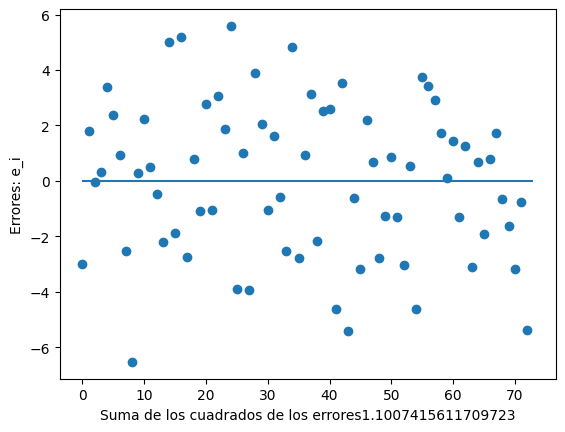

In [93]:
plt.scatter(range(0, len(errores)), errores)
plt.hlines(
    y=0,
    xmin=0,
    xmax = len(errores),
    linestyles='solid'
)
plt.ylabel('Errores: e_i')
plt.xlabel('Suma de los cuadrados de los errores'+str((errores.sum())**2))

C:\Users\ldanl\AppData\Local\Temp\ipykernel_28420\3958846741.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errores)


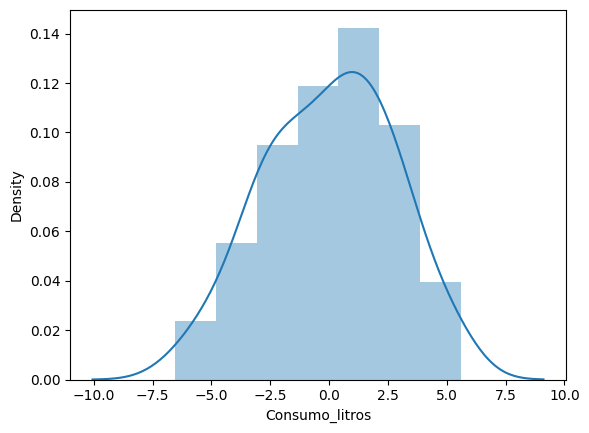

In [94]:
sns.distplot(errores)
plt.show()

In [95]:
model1.score(X_test, y_test)

0.6581380817532352

In [97]:
MAPE_model1 = metrics.mean_absolute_percentage_error(y_test, y_sombrero)*100
MAPE_model1

8.912169368440074

In [100]:
x = datos[['Temperatura_Minima', 'Precipitacion','Fin_de_semana']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model2 = LinearRegression()
model2.fit(X_train, y_train)
y_sombrero = model2.predict(X_test)
MAPE_model2 = metrics.mean_absolute_percentage_error(y_test, y_sombrero)*100
MAPE_model2

10.207950582265639

In [104]:
x = datos[['Temperatura_Media', 'Precipitacion','Fin_de_semana']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model3 = LinearRegression()
model3.fit(X_train, y_train)
y_sombrero = model3.predict(X_test)
MAPE_model2 = metrics.mean_absolute_percentage_error(y_test, y_sombrero)*100
MAPE_model2

9.042911340861721

In [105]:
x = datos[['Temperatura_Maxima','Temperatura_Minima','Temperatura_Media', 'Precipitacion','Fin_de_semana']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model4 = LinearRegression()
model4.fit(X_train, y_train)
y_sombrero = model4.predict(X_test)
MAPE_model2 = metrics.mean_absolute_percentage_error(y_test, y_sombrero)*100
MAPE_model2

7.92798091122265